In [777]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

In [778]:
df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
print(df.head())
print(df.shape)
df = df.dropna()
print(df.shape)

labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

          0         1         2         3         4         5         6  \
0  0.965577  0.972887  0.979874  0.986540  0.992884  0.998907  1.004607   
1  1.412801  1.434907  1.456854  1.478642  1.500274  1.521748  1.543067   
2 -6.269562 -6.180535 -6.090352 -5.999171 -5.907138 -5.814394 -5.721070   
3 -5.467689 -5.498957 -5.530962 -5.563697 -5.597151 -5.631314 -5.666172   
4  8.167271  8.174361  8.181242  8.187913  8.194377  8.200633  8.206685   

          7         8         9  ...       4491       4492       4493  \
0  1.009987  1.015044  1.019781  ...  -0.848436  -0.825913  -0.805708   
1  1.564230  1.585239  1.606095  ...   0.801625   0.817496   0.831223   
2 -5.627289 -5.533165 -5.438803  ...   0.169959   0.187393   0.202547   
3 -5.701710 -5.737910 -5.774751  ...   0.256673   0.280612   0.302148   
4  8.212531  8.218175  8.223616  ... -10.589231 -10.549112 -10.509500   

        4494       4495       4496       4497       4498       4499  labels  
0  -0.787825  -0.772263  -0.7590

In [779]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [780]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [781]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [782]:
# tworzenie modelu
model = LogisticRegression(max_iter=1000)

In [783]:
# trenowanie modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [784]:
# przewidywanie na danych testowych
predictions = model.predict(X_test)

In [785]:
# sprawdzanie dokładności modelu
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100}%")

Accuracy: 73.80952380952381%


In [786]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [787]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

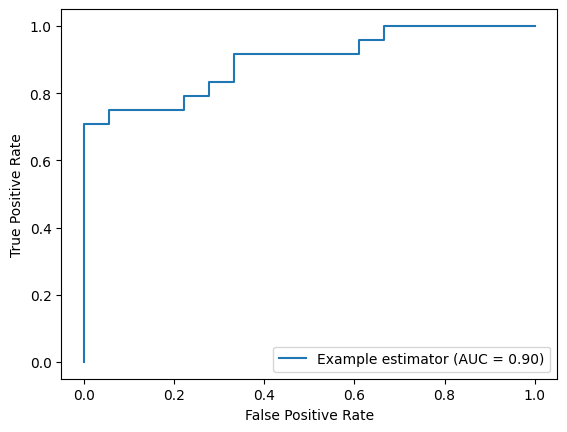

In [788]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()

Text(0.5, 1.0, 'CONFUSION MATRIX')

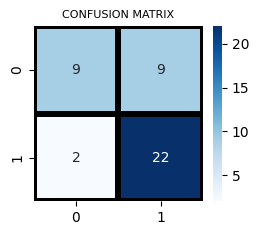

In [789]:
#Confusion matrix
plt.figure(figsize=(6,5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=8)